Import the neccessary libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

Data Loading

In [32]:
df = pd.read_csv("weather.csv")
print(df.head().to_string())
print(df.info())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


Data Preprocesing and Feature Engineering

In [33]:
# Data Preprocesing is critical for machine learning models
# First, we need to convert the categorical target variable ("weather") into a numerical labels,
# as most Ml algorithms require numerical input. We'll use th LabelEncoder for this
le = LabelEncoder()
df["weather_encoded"] = le.fit_transform(df["weather"])

# Next, we select the features (X) and the target (y)
# We'll drop the original "weather" column and the "date" column, as it's not directly
# useful for the specific model without futher feature engineering
features = ["precipitation","temp_max","temp_min","wind"]
target = "weather_encoded"

X = df[features]
y = df[target]

print("Shape of the features (X):",X.shape)
print("Shape of target (y):",y.shape)

Shape of the features (X): (1461, 4)
Shape of target (y): (1461,)


Data Splitting

In [34]:
# We'll split the data into the training sets to evaluate our model on unseen data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Number of samples in training set:",len(X_train))
print("Number of samples in testing set:",len(X_test))

Number of samples in training set: 1168
Number of samples in testing set: 293


Model Training

In [35]:
# We initialize our Decision Tree Classifier model and train it using the training data
print("Training the Decision Tree Classifier model")
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
print("Model Training Complete")

Training the Decision Tree Classifier model
Model Training Complete


Model Evaluation

In [36]:
# We make predictions on the test set and evaluate the model's performance using
# accuracy and a detailed classification report
print("Evaluating the model")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred,target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Clasification Report:",report)

Evaluating the model
Accuracy: 0.73
Clasification Report:               precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.23      0.20      0.21        25
        rain       0.90      0.88      0.89       120
        snow       0.36      0.50      0.42         8
         sun       0.78      0.76      0.77       131

    accuracy                           0.73       293
   macro avg       0.45      0.47      0.46       293
weighted avg       0.74      0.73      0.74       293



Visualization

Plotting confusion matrix.....


<Figure size 1000x800 with 0 Axes>

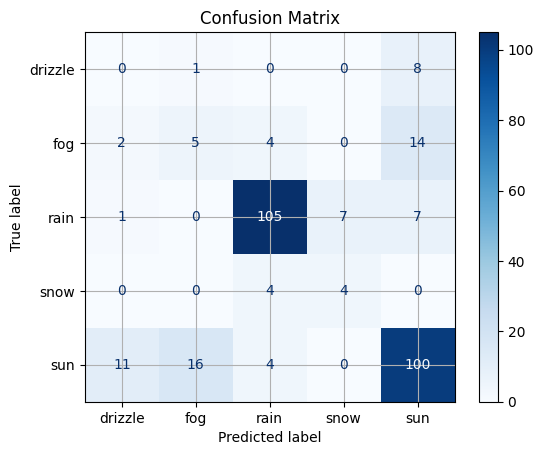

In [37]:
# A confusion matrix helps visualize how well our model performed on each class
# The rows represent the actual classes, and the columns represent the predicted classes
# The diagonal values show the number of correct predictions for each class

print("Plotting confusion matrix.....")
cm = confusion_matrix(y_test,y_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
plt.figure(figsize=(10,8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(True)
plt.show()

Making a New Prediction

In [38]:
# We can use the trained model to predict the weather for a new data point.
# Note: The values are hypothetical for demonstration
new_data = pd.DataFrame([[5.0, 10.0, 5.0, 3.0]], columns=features)
predicted_label = model.predict(new_data)
predicted_weather = le.inverse_transform(predicted_label)

print(f"Example prediction for a new data point")
print(f"Features: precipitation=5.0,temp_max=10.0,temp_min=5.0,wind=3.0")
print(f"Predicted Weather: {predicted_weather[0]}")

Example prediction for a new data point
Features: precipitation=5.0,temp_max=10.0,temp_min=5.0,wind=3.0
Predicted Weather: rain
